# Discrete Operator

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#Differential Matrix Function
def create_differential_matrix(L, R, N, dx, a):
    if L + R + 1 != len(a):
        raise ValueError("The shape of coefficient array 'a' must be L + R + 1.")
    if L + R + 1 > N:
        raise ValueError("The condition L + R + 1 <= N is not satisfied.")

    D = np.zeros((N, N))

    # Fill in D with coefficients from a
    for i in range(N):
        for j in range(-L, R + 1):
            col_index = (i + j) % N  # Modulo operator for periodic boundary condition
            D[i, col_index] = a[j + L] / dx

    return D

# Adjust N and Left and Right pointers based on which approximation method you're using (central, forward, backward)
N = 5  # Number of points
dx = 1.0 / N  # Grid spacing

# Coefficient vectors for central and forward differences
a_central = np.array([-0.5, 0, 0.5])
a_forward = np.array([-1, 1])

L,R = 1,1
D_central = create_differential_matrix(L, R, N, dx, a_central)
print("Central Difference Matrix:\n", D_central)

L,R = 0,1
D_forward = create_differential_matrix(0, 1, N, dx, a_forward)
print("Forward Difference Matrix:\n", D_forward)


Central Difference Matrix:
 [[ 0.   2.5  0.   0.  -2.5]
 [-2.5  0.   2.5  0.   0. ]
 [ 0.  -2.5  0.   2.5  0. ]
 [ 0.   0.  -2.5  0.   2.5]
 [ 2.5  0.   0.  -2.5  0. ]]
Forward Difference Matrix:
 [[-5.  5.  0.  0.  0.]
 [ 0. -5.  5.  0.  0.]
 [ 0.  0. -5.  5.  0.]
 [ 0.  0.  0. -5.  5.]
 [ 5.  0.  0.  0. -5.]]


# Error Analysis

In [59]:
# Test function and its analytical derivative
def test_function(x):
    return np.sin(2 * np.pi * x)

def analytical_derivative(x):
    return 2 * np.pi * np.cos(2 * np.pi * x)

# Discretize the domain, Adjust N Accordingly
N = 20 # Number of points
x = np.linspace(0, 1, N, endpoint=False)  # Exclude the endpoint because of periodicity condition
dx = x[1] - x[0]  # Grid spacing

# Calculate the analytical derivative for each discretized point
f_prime_analytical = analytical_derivative(x)

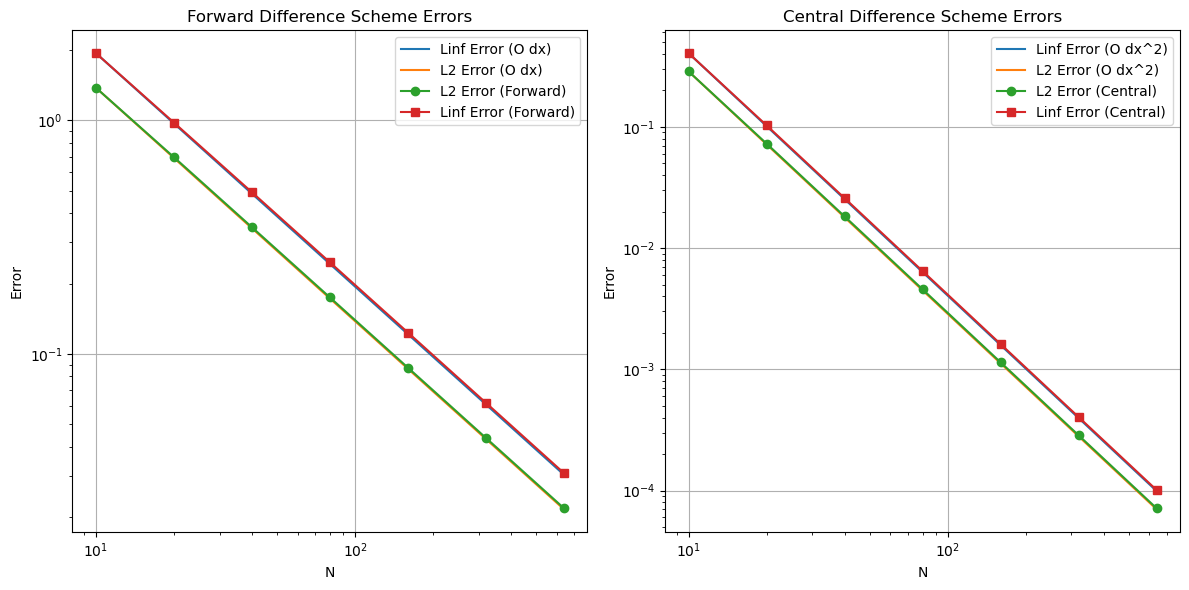

In [70]:
def error_analysis(N_values, test_function, analytical_derivative):
    l2_errors_forward = []
    linf_errors_forward = []
    l2_errors_central = []
    linf_errors_central = []

    for N in N_values:
        dx = 1.0 / N
        x = np.linspace(0, 1, N, endpoint=False)
        f_exact = analytical_derivative(x)
        
        # Forward difference scheme
        D_forward = create_differential_matrix(0, 1, N, dx, a_forward)
        f_prime_forward = D_forward @ test_function(x)
        linf_errors_forward.append(np.max(np.abs(f_prime_forward - f_exact)))
        l2_errors_forward.append(np.linalg.norm(f_prime_forward - f_exact, ord=2) / np.sqrt(N))

        # Central difference scheme
        D_central = create_differential_matrix(1, 1, N, dx, a_central)
        f_prime_central = D_central @ test_function(x)
        linf_errors_central.append(np.max(np.abs(f_prime_central - f_exact)))
        l2_errors_central.append(np.linalg.norm(f_prime_central - f_exact, ord=2) / np.sqrt(N))
    plt.figure(figsize=(12, 6))

#Validate results with slope of norms
    slope = 1/( N_values[-1]/N_values[0])
    err_scale_inf_c= [linf_errors_central[0], linf_errors_central[0]*slope**2]
    err_scale_2_c = [l2_errors_central[0], l2_errors_central[0]*slope**2]
    
    err_scale_inf_f = [linf_errors_forward[0], linf_errors_forward[0]*slope]
    err_scale_2_f = [l2_errors_forward[0], l2_errors_forward[0]*slope]
    #Uncomment to produce errors shown in report
    # print(f'inifinity errors for forward difference: {linf_errors_forward}')
    # print(f'2 errors for forward difference {l2_errors_forward}')

    # print(f'inifinity errors for central difference: {linf_errors_central}')
    # print(f'2 errors for central difference {l2_errors_central}')

# Forward difference errors
    plt.subplot(1, 2, 1)
    plt.grid()
    plt.loglog([N_values[0], N_values[-1]], err_scale_inf_f, label='Linf Error (O dx)')
    plt.loglog([N_values[0], N_values[-1]], err_scale_2_f, label='L2 Error (O dx)')
    plt.loglog(N_values, l2_errors_forward, 'o-', label='L2 Error (Forward)')
    plt.loglog(N_values, linf_errors_forward, 's-', label='Linf Error (Forward)')
    plt.title('Forward Difference Scheme Errors')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.legend()

# Central difference errors
    plt.subplot(1, 2, 2)
    plt.grid()
    plt.loglog([N_values[0], N_values[-1]], err_scale_inf_c, label ='Linf Error (O dx^2)')
    plt.loglog([N_values[0], N_values[-1]], err_scale_2_c, label='L2 Error (O dx^2)')
    plt.loglog(N_values, l2_errors_central, 'o-', label='L2 Error (Central)')
    plt.loglog(N_values, linf_errors_central, 's-', label='Linf Error (Central)')
    plt.title('Central Difference Scheme Errors')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.legend()

    plt.tight_layout()
    plt.show()

N_values = [10, 20, 40, 80, 160, 320, 640]
error_analysis(N_values, test_function, analytical_derivative)


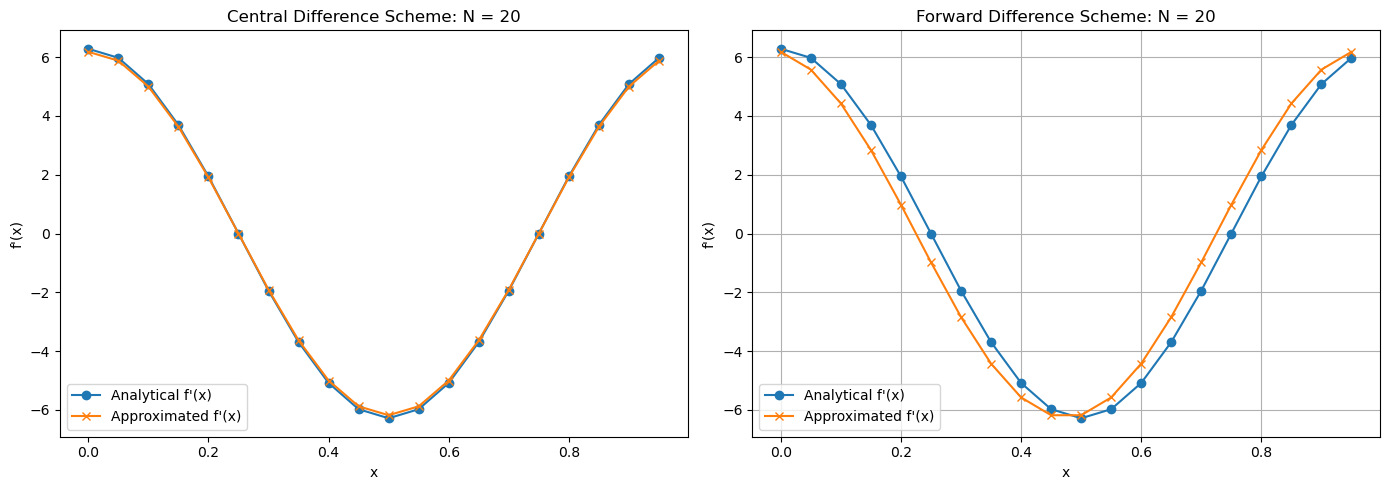

(0.32522577310672207, 3.1124958139986525)

In [72]:
# Apply the difference matrices to approximate the derivative
f_prime_central = create_differential_matrix(1, 1, N, dx, a_central) @ test_function(x)
f_prime_forward = create_differential_matrix(0, 1, N, dx, a_forward) @ test_function(x)

# Calculate the error using discrete L2 norm
error_central = np.linalg.norm(f_prime_central - f_prime_analytical, 2)
error_forward = np.linalg.norm(f_prime_forward - f_prime_analytical, 2)

# Plot the results for visualization
plt.figure(figsize=(14, 5))

# Central Difference Scheme
plt.subplot(1, 2, 1)
plt.plot(x, f_prime_analytical, 'o-', label='Analytical f\'(x)')
plt.plot(x, f_prime_central, 'x-', label='Approximated f\'(x)')
plt.title(f'Central Difference Scheme: N = {N}')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()

# Forward Difference Scheme
plt.subplot(1, 2, 2)
plt.plot(x, f_prime_analytical, 'o-', label='Analytical f\'(x)')
plt.plot(x, f_prime_forward, 'x-', label='Approximated f\'(x)')
plt.title(f'Forward Difference Scheme: N = {N}')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

error_central, error_forward